# In this notebook we modify the color of the corrected rasters (using ipad).

## proveding a list of valid colors, colors which are not valid will be repaced by the closest valid color

In [4]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# merge the inputs
%autoreload
import numpy as np
import sys
import os
import glob
import imageio
import time
sys.path.append("..")
from scipy import ndimage, signal
from cv2 import medianBlur

from PIL import Image
from costum_arild.source.utils import image_processing_utils

In [8]:
# list of valid colors
color_matrix = np.array([[0,0,255], [255,255,0], [0,128,0], [128,128,0], [128,0,128], [0,0,0]], dtype=np.uint8)
color_matrix_float = color_matrix / 255

# list of all images
src_image_path = '/home/saeid/phd/segmentation/dataset/neurips dataset/raster_corrected/laerdal_students/lbl_png_rgb'
dest_folder_path = '/home/saeid/phd/segmentation/dataset/neurips dataset/raster_corrected/laerdal_students/lbl_png'

for image_path in glob.glob(os.path.join(src_image_path, '*.png')):
    start = time.time()
    print(f'working on image {os.path.split(image_path)[-1]}')
    
    dest_path = os.path.join(dest_folder_path, os.path.split(image_path)[-1])
    # read image
    original_image_matrix = imageio.imread(image_path)
    if original_image_matrix.shape[-1] > 3:
        print('image has more than 3 channels, only first 3 channels are used')
        original_image_matrix = original_image_matrix[:,:,:3]
    original_image_matrix = original_image_matrix / 255
    
    # modify it and replace the colors
    replaced_image_matrix = image_processing_utils.color_nearest_neighbors(img_matrix=original_image_matrix, clr_matrix=color_matrix_float)
    replaced_image_matrix = replaced_image_matrix * 255
    
    # convert image into 2d
    replaced_image_onehot = image_processing_utils.one_hot_encode(replaced_image_matrix.astype(np.uint8), color_matrix)
    replaced_image_2d = image_processing_utils.one_hot_decode(replaced_image_onehot)
    
    # perform median filter
    size_val = 7
    replaced_image_2d_median = image_processing_utils.median_filter(image=replaced_image_2d, kernel_size=size_val)
    
    # convert back
    replaced_image_cleaned = image_processing_utils.label_to_rgb(replaced_image_2d_median)
        
    # save to file
    replaced_image_png = Image.fromarray(replaced_image_cleaned.astype(np.uint8))
    replaced_image_png.save(dest_path)
    
    end = time.time()
    print(f'the time takes {end - start}')

working on image 33-2-438-164-12 2.jpg
the time takes 18.041419744491577


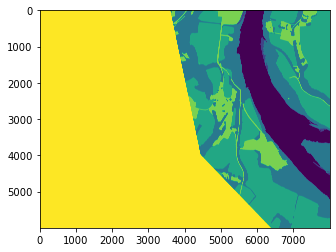

In [11]:
import matplotlib.pyplot as plt

plt.imshow(replaced_image_2d)

In [5]:
image_processing_utils.one_hot_encode(replaced_image_matrix, color_matrix).sum()

48000000

In [6]:
color_matrix[2]

array([  0, 128,   0], dtype=uint8)

# getting the statistics of the data (number of classes per pixels)

In [4]:
import numpy as np
import sys
import os
import glob
import imageio
import time
sys.path.append("..")
from scipy import ndimage, signal
from cv2 import medianBlur

from PIL import Image
from costum_arild.source.utils import image_processing_utils

In [33]:
# list of valid colors
color_matrix = np.array([[0,0,255], [255,255,0], [0,128,0], [128,128,0], [128,0,128], [0,0,0]], dtype=np.uint8)
color_matrix_float = color_matrix / 255

class_count_list = []

# list of all images
src_image_path = '/home/saeid/phd/segmentation/dataset/large images/rasters_png/all_label_correct_ipad'

start = time.time()
for image_path in glob.glob(os.path.join(src_image_path, '*.png')):
    print(f'working on image {os.path.split(image_path)[-1]}')
    
    # read image
    original_image_matrix = imageio.imread(image_path)
    if original_image_matrix.shape[-1] > 3:
        print('image has more than 3 channels, only first 3 channels are used')
        original_image_matrix = original_image_matrix[:,:,:3]
    original_image_matrix = original_image_matrix / 255
    
    # modify it and replace the colors
    replaced_image_matrix = image_processing_utils.color_nearest_neighbors(img_matrix=original_image_matrix, clr_matrix=color_matrix_float)
    replaced_image_matrix = replaced_image_matrix * 255
    
    # convert image into 2d
    replaced_image_onehot = image_processing_utils.one_hot_encode(replaced_image_matrix.astype(np.uint8), color_matrix)
    replaced_image_2d = image_processing_utils.one_hot_decode(replaced_image_onehot)
    
    # get the information about the classes
    (unique_tmp, counts_tmp) = np.unique(replaced_image_2d, return_counts=True)
    class_count_vec = np.zeros(6)
    class_count_vec[unique_tmp] = counts_tmp
    
    class_count_list.append(class_count_vec)
    
end = time.time()
print(f'the time takes {end - start}')

working on image 33-2-463-211-03.png
working on image 33-2-462-209-12.png
working on image 33-2-436-165-31.png
working on image 33-2-462-207-32.png
working on image 33-2-437-164-22.png
working on image 33-2-462-210-10 .png
working on image 33-2-450-207-13.png
working on image 33-2-464-206-13.png
working on image 33-2-462-208-31.png
working on image 33-2-464-207-01.png
image has more than 3 channels, only first 3 channels are used
working on image 33-2-462-209-20.png
working on image 33-2-439-164-21 (1).png
working on image 33-2-439-164-13.png
working on image 33-2-437-164-23.png
working on image 33-2-436-165-33.png
working on image 33-2-465-205-03.png
working on image 33-2-463-211-00.png
image has more than 3 channels, only first 3 channels are used
working on image 33-2-462-209-10.png
working on image 33-2-464-206-03.png
working on image 33-2-464-206-31.png
working on image 33-2-462-209-23.png
working on image 33-2-462-210-20.png
working on image 33-2-462-209-12-new.png
working on ima

In [59]:
import pandas as pd

In [60]:
class_df = pd.DataFrame(class_count_list, dtype='float32')

In [61]:
class_df.loc['class_sum'] = class_df.sum(axis=0)
# class_df.loc[:,'individual_sum'] = class_df.sum(axis=1)

In [62]:
class_df

,0,1,2,3,4,5
0,2395297.00000,1563529.00000,12620390.00000,29389684.00000,2029146.00000,1953.00000
1,1624599.00000,1632666.00000,13658679.00000,25107312.00000,5973371.00000,3374.00000
2,2231821.00000,723136.00000,11813440.00000,10681998.00000,1065400.00000,21484204.00000
3,1432756.00000,1741824.00000,41630468.00000,2358851.00000,822927.00000,13174.00000
4,2079939.00000,450015.00000,8061551.00000,14656750.00000,2831297.00000,19920448.00000
...,...,...,...,...,...,...
83,967163.00000,526051.00000,15613988.00000,29672508.00000,1219473.00000,816.00000
84,1557611.00000,463400.00000,19821472.00000,16622585.00000,1452412.00000,8082519.00000
85,946130.00000,189874.00000,44449960.00000,1961133.00000,452248.00000,657.00000
86,297479.00000,116326.00000,797736.00000,2383149.00000,270350.00000,2473.00000


In [72]:
class_df = class_df.rename(columns={0: "water", 1: "gravel", 2: "vegetation", 3: "farmland", 4: "human construction", 5: "unknown"})

In [73]:
class_df.loc['class_sum_percent'] = ((class_df.loc['class_sum'] / class_df.loc['class_sum'].sum()) * 100)

In [76]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
class_df

,water,gravel,vegetation,farmland,human construction,unknown
0,2395297.00000,1563529.00000,12620390.00000,29389684.00000,2029146.00000,1953.00000
1,1624599.00000,1632666.00000,13658679.00000,25107312.00000,5973371.00000,3374.00000
2,2231821.00000,723136.00000,11813440.00000,10681998.00000,1065400.00000,21484204.00000
3,1432756.00000,1741824.00000,41630468.00000,2358851.00000,822927.00000,13174.00000
4,2079939.00000,450015.00000,8061551.00000,14656750.00000,2831297.00000,19920448.00000
...,...,...,...,...,...,...
84,1557611.00000,463400.00000,19821472.00000,16622585.00000,1452412.00000,8082519.00000
85,946130.00000,189874.00000,44449960.00000,1961133.00000,452248.00000,657.00000
86,297479.00000,116326.00000,797736.00000,2383149.00000,270350.00000,2473.00000
class_sum,154578000.00000,69454232.00000,2069544064.00000,908972736.00000,137785648.00000,739692800.00000


In [79]:
class_df.to_csv('/home/saeid/phd/segmentation/dataset/large images/rasters_png/all_label_correct_ipad/class_count.csv') 